In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


We will train a neural network to recognize items of clothing from a common dataset called Fashion MNIST. You can learn more about this dataset [here](https://github.com/zalandoresearch/fashion-mnist).

It contains 70,000 items of clothing in 10 different categories. Each item of clothing is in a 28x28 greyscale image. You can see some examples here:

![alt text](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [0]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

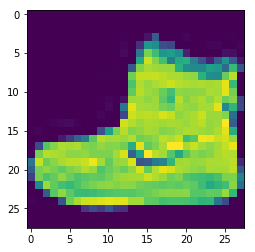

In [0]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

Note, we already have 2 sets, train and test

Let's now design the model. There's quite a few new concepts here, but don't worry, you'll get the hang of them. 

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

W1105 13:28:59.046881 140387546691456 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling __init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.4959 - acc: 0.8261
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3749 - acc: 0.8663
Epoch 3/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3350 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3104 - acc: 0.8862
Epoch 5/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2933 - acc: 0.8916


Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9098. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 5 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3419 - acc: 0.8778


[0.3418937015295029, 0.8778]

For me, that returned a accuracy of about .8838, which means it was about 88% accurate. As expected it probably would not do as well with *unseen* data as it did with data it was trained on!  As you go through this course, you'll look at ways to improve this. 

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

classifications = model.predict(test_images)
classifications[:10]


array([[2.59793680e-08, 1.60316448e-11, 5.07920546e-11, 1.46056136e-11,
        5.45647243e-11, 3.94292409e-04, 1.80627735e-09, 8.14432371e-03,
        2.58869570e-09, 9.91461396e-01],
       [1.93371652e-05, 1.47599183e-10, 9.93132055e-01, 4.00122993e-08,
        2.19603395e-03, 1.62522384e-10, 4.65264777e-03, 9.46181414e-12,
        1.73102723e-08, 7.42795936e-10],
       [5.60613200e-09, 1.00000000e+00, 1.68349471e-12, 2.06963136e-09,
        1.37025646e-09, 4.02437926e-18, 2.11564113e-10, 3.91789051e-18,
        4.29446322e-12, 2.19976731e-18],
       [1.01514290e-08, 9.99999762e-01, 5.48778176e-11, 2.68351471e-07,
        3.22801981e-08, 6.34228889e-16, 1.72964043e-09, 1.56961108e-16,
        6.25391449e-12, 1.67274999e-15],
       [9.41978395e-02, 2.90960628e-07, 1.08436085e-02, 2.81811412e-03,
        1.56071887e-03, 5.01008071e-05, 8.90433908e-01, 5.13403211e-06,
        8.80504886e-05, 2.21360779e-06],
       [9.35721346e-06, 9.99988317e-01, 1.02054001e-08, 5.68203006e-07,
   

In [0]:
# probably not what we want...
class_labels = [np.argmax(c) for c in classifications]
class_labels[:10]


[9, 2, 1, 1, 6, 1, 4, 6, 5, 7]

In [0]:
print(classification_report(test_labels, class_labels))
print(confusion_matrix(test_labels, class_labels))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.74      0.78      1000
           3       0.92      0.86      0.89      1000
           4       0.74      0.86      0.80      1000
           5       0.97      0.95      0.96      1000
           6       0.70      0.68      0.69      1000
           7       0.94      0.94      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.94      0.96      0.95      1000

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[849   1   7  13   6   2 109   0  13   0]
 [  3 971   0  20   3   0   2   0   1   0]
 [ 15   1 745   9 126   0  99   0   4   1]
 [ 22   5  12 859  74   0  23   0   5   0]
 [  0   0  71  12 865   0  50   0   2   0]
 [  0   0   0   0   0 955 

# Exploration


In [0]:
classifications = model.predict(test_images)

print(classifications[0])

[2.5217558e-04 3.7938943e-08 2.5998716e-05 1.6718715e-06 6.2047702e-06
 6.0425480e-03 4.2082043e-05 3.9597478e-02 5.0735616e-05 9.5398116e-01]


In [0]:
print(test_labels[0])

9


### What does this list represent?

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])
print(model.evaluate(test_images, test_labels))

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 16s 273us/sample - loss: 0.4688
Epoch 2/5
60000/60000 [==============================] - 18s 292us/sample - loss: 0.3566
Epoch 3/5
60000/60000 [==============================] - 18s 297us/sample - loss: 0.3219
Epoch 4/5
60000/60000 [==============================] - 19s 316us/sample - loss: 0.2962
Epoch 5/5
10000/10000 [==============================] - 1s 121us/sample - loss: 0.3367
[2.2986117e-07 3.2038270e-09 1.6702250e-08 1.1712285e-10 4.6172790e-09
 6.4975685e-03 1.0792946e-07 1.0311109e-02 5.8231933e-07 9.8319042e-01]
9


###Increase to 1024 Neurons -- What's the impact?


What would happen if you remove the Flatten() layer?

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0


model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# This version has the 'flatten' removed. Replace the above with this one to see the error.
#model = tf.keras.models.Sequential([tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])
print(model.evaluate(test_images, test_labels))

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5171
Epoch 2/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3905
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3530
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3305
Epoch 5/5
10000/10000 [==============================] - 0s 37us/sample - loss: 0.3737
[6.9159591e-06 9.6780617e-08 1.8497082e-06 1.8597434e-07 9.2623583e-07
 7.9685412e-02 1.1851783e-05 5.7747267e-02 8.9853951e-05 8.6245567e-01]
9


Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

# Replace the above model definiton with this one to see the network with 5 output layers
# And you'll see errors as a result!
# model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
#                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
#                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])
print(model.evaluate(test_images, test_labels))

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.5144
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3901
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3543
Epoch 4/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3290
Epoch 5/5
10000/10000 [==============================] - 0s 38us/sample - loss: 0.3691
[2.2798986e-05 5.1289550e-07 6.3431130e-06 4.8652887e-06 7.2162846e-05
 7.8969225e-03 2.6900971e-05 3.8877510e-02 1.0675688e-05 9.5308131e-01]
9


Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10. 

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 14s 233us/sample - loss: 0.4673
Epoch 2/5
60000/60000 [==============================] - 15s 243us/sample - loss: 0.3538
Epoch 3/5
60000/60000 [==============================] - 14s 230us/sample - loss: 0.3212
Epoch 4/5
60000/60000 [==============================] - 15s 254us/sample - loss: 0.2950
Epoch 5/5
10000/10000 [==============================] - 1s 116us/sample - loss: 0.3938
[3.1909721e-08 4.8842873e-07 2.0950308e-08 4.8768747e-08 3.5401705e-08
 1.2880723e-03 1.7159913e-08 5.3360127e-03 5.8233803e-07 9.9337465e-01]
9


Consider the impact of training for more or less epochs. Why do you think that would be the case? 

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

1.15.0
Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 84us/sample - loss: 0.5000
Epoch 2/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3752
Epoch 3/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.3364
Epoch 4/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.3145
Epoch 5/30
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2970
Epoch 6/30
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2825
Epoch 7/30
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2692
Epoch 8/30
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2594
Epoch 9/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2492
Epoch 10/30
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2406
Epoch 11/30
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2342


In [0]:
print(model.evaluate(test_images, test_labels))

10000/10000 [==============================] - 1s 69us/sample - loss: 0.3343 - acc: 0.8805
[0.3343120214223862, 0.8805]


Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

In [0]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# To experiment with removing normalization, comment out the following 2 lines
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 192us/sample - loss: 0.4763
Epoch 2/5
60000/60000 [==============================] - 10s 167us/sample - loss: 0.3610
Epoch 3/5
60000/60000 [==============================] - 10s 175us/sample - loss: 0.3218
Epoch 4/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2974
Epoch 5/5
10000/10000 [==============================] - 1s 99us/sample - loss: 0.3466
[1.0879003e-07 6.5257559e-08 4.9490847e-08 4.6523397e-08 3.6314372e-08
 2.1044658e-03 2.3366086e-07 1.3717788e-01 4.1238482e-06 8.6071301e-01]
9


In [0]:
print(model.evaluate(test_images, test_labels))

10000/10000 [==============================] - 1s 61us/sample - loss: 0.3343 - acc: 0.8805
[0.3343120214223862, 0.8805]


Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [0]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

print(model.evaluate(test_images, test_labels))



1.15.0
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 186us/sample - loss: 0.4700 - acc: 0.8318
Epoch 2/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.3576 - acc: 0.8694
Epoch 3/5
60000/60000 [==============================] - 11s 182us/sample - loss: 0.3213 - acc: 0.8824
Epoch 4/5
60000/60000 [==============================] - 11s 184us/sample - loss: 0.2990 - acc: 0.8901
Epoch 5/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2781 - acc: 0.8955
